In [1]:
import pandas as pd 

df = pd.read_csv('dataset\spotify_songs.csv')
print(df.shape)
df = df.drop_duplicates(subset='track_id')
print(df.shape)

df = df.dropna()
print(df.shape)

# Save the cleaned dataframe to a new CSV file
df.to_csv('dataset/spotify_songs_clean.csv', index=False)

(32833, 23)
(28356, 23)
(28352, 23)


In [2]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,39.335320,0.653375,0.698373,5.367417,-6.817777,0.565533,0.107939,0.177192,0.091129,0.190955,0.510386,120.958219,226574.631102
std,23.699443,0.145791,0.183508,3.613743,3.036433,0.495696,0.102547,0.222814,0.232562,0.155888,0.234344,26.954502,61081.363704
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.310250,0.000000,0.041000,0.014300,0.000000,0.092600,0.329000,99.972000,187741.250000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.993500,216933.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999000,254975.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [48]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
release_year                float64
dtype: object

In [27]:
# count the number of uniques values for each columns
df.nunique()
# print all the different values for the column key
print(df['key'].unique())

[ 6 11  1  7  8  5  4  2  0 10  9  3]


Text(0, 0.5, '')

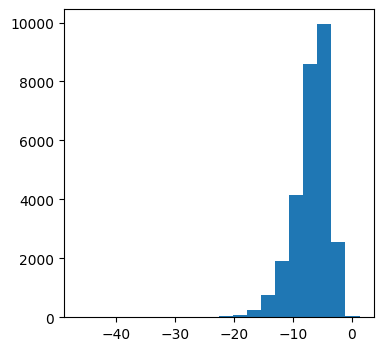

In [12]:
#plot an histogram of the popularity and remove the y label
# Convert the 'track_album_release_date' to datetime if not already done
# Plot a histogram of the popularity and remove the y label
df['loudness'].plot.hist(bins=20, figsize=(4, 4)).yaxis.set_label_text('')

# make a pie chart for the mode column
#df['mode'].value_counts().plot.pie(figsize=(4, 4)).set_ylabel('')


In [40]:
df_dup_id = df.copy()
df_dup_id['name_count'] = df_dup_id.groupby('track_name')['track_name'].transform('count')
df_dup_id['name_count'] = df_dup_id.groupby(['name_count'])['name_count'].transform('count')
df_dup_id['id_count'] = df_dup_id.groupby(['track_id'])['track_id'].transform('count')
df_id_name_error = df_dup_id[df_dup_id['id_count'] != df_dup_id['name_count']]
df_id_name_error.sort_values(by=['track_id'])
df_id_name_error[df_id_name_error['track_name'] == 'Signs']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,name_count,id_count
23851,6Na5uKk5SsqZimk0hAWo8y,Signs,Drake,70,1JZxCJ86P4GUYkHj03CgDT,Signs,2017-06-23,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,1,0.054,0.108,0.00578,0.112,0.223,107.374,234373,20427,1


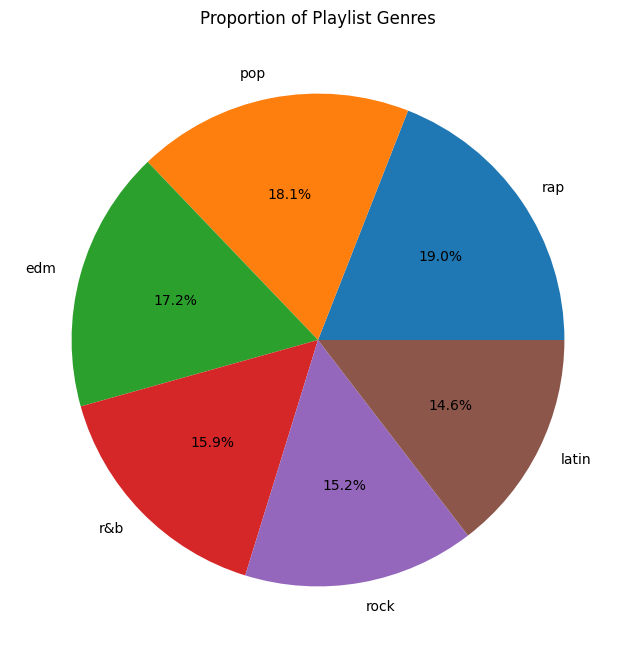

In [29]:
import matplotlib.pyplot as plt

# Count the occurrences of each genre
genre_counts = df['playlist_genre'].value_counts()

# Plot the proportions
genre_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.title('Proportion of Playlist Genres')
plt.show()

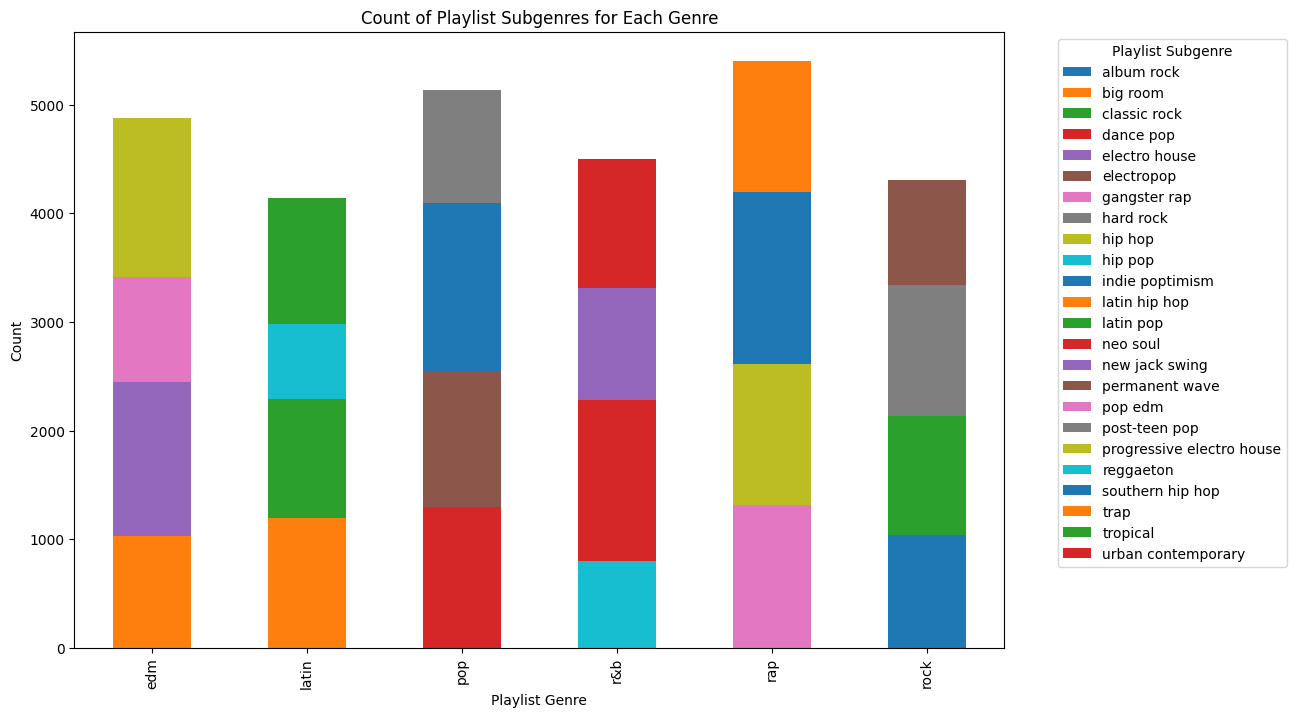

In [30]:
# Group by 'playlist_genre' and 'playlist_subgenre' and count the occurrences
subgenre_counts = df.groupby(['playlist_genre', 'playlist_subgenre']).size().unstack()

# Plot the subgenre counts for each genre
subgenre_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.title('Count of Playlist Subgenres for Each Genre')
plt.legend(title='Playlist Subgenre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

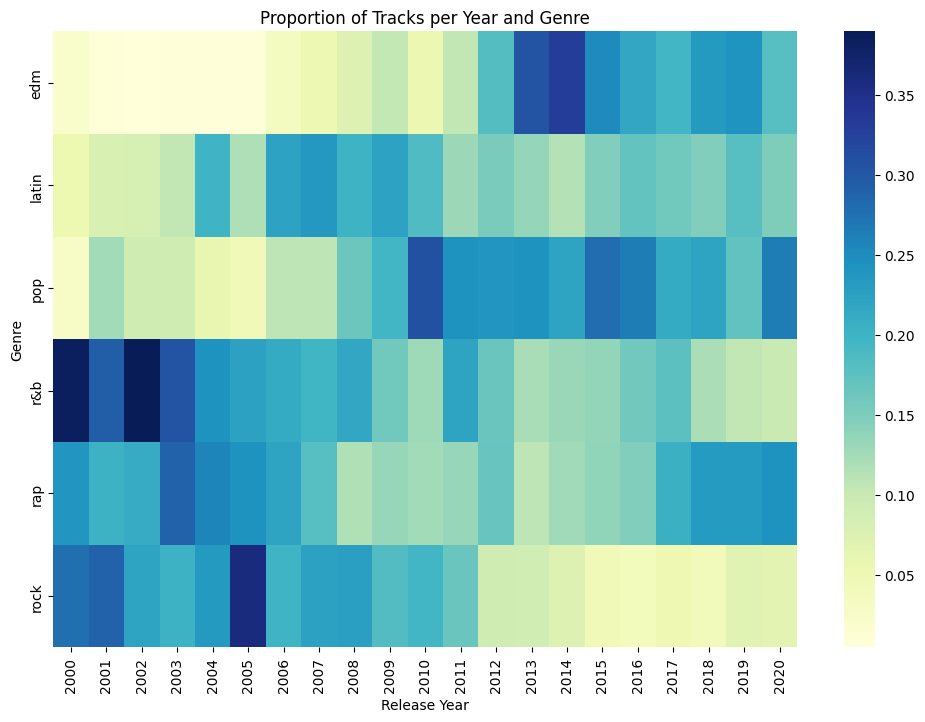

In [46]:
import seaborn as sns

# Extract the year from the track_album_release_date
df['release_year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Create a pivot table with the count of tracks per year and genre
pivot_table = df.pivot_table(index='playlist_genre', columns='release_year', aggfunc='size', fill_value=0)

# Filter the pivot table to include only the years from 2000 to 2020
pivot_table.columns = pivot_table.columns.astype(int)
pivot_table = pivot_table.loc[:,2000:2020]

# Normalize the pivot table to get proportions
pivot_table_normalized = pivot_table.div(pivot_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_normalized, cmap='YlGnBu', annot=False, fmt='.2f')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.title('Proportion of Tracks per Year and Genre')
plt.xticks(rotation=90)
plt.show()


In [49]:
# Find the maximum year in the dataset
max_year = df['track_album_release_date'].min()
max_year

'1957-01-01'

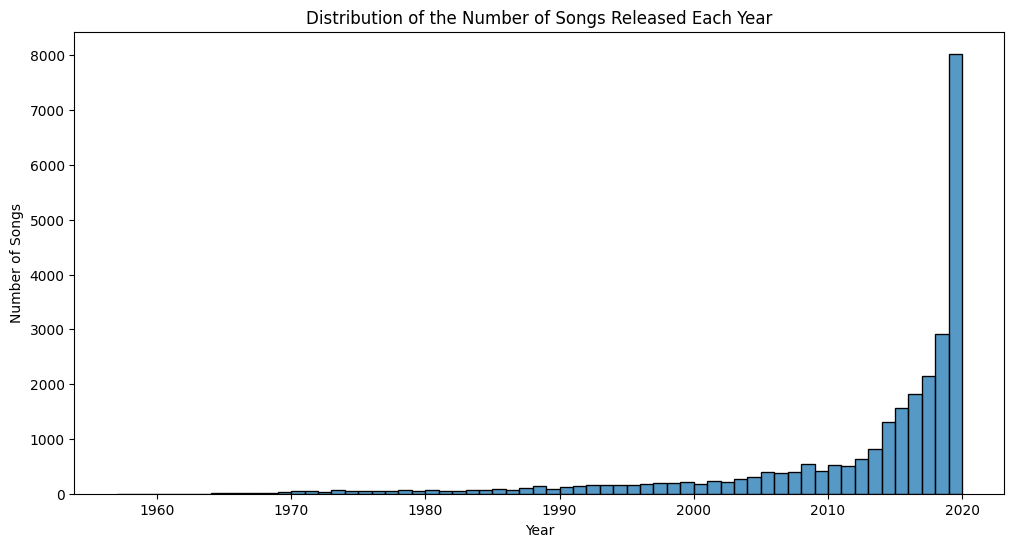

In [34]:
# Convert the 'track_album_release_date' to datetime if not already done
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year from the 'track_album_release_date'
df['release_year'] = df['track_album_release_date'].dt.year

# Plot the distribution of the number of songs released each year
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'].dropna(), bins=range(int(df['release_year'].min()), int(df['release_year'].max()) + 1), kde=False)
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Distribution of the Number of Songs Released Each Year')
plt.show()

In [1]:
!pip install plotly

  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
Using cached plotly-6.0.0-py3-none-any.whl (14.8 MB)


In [11]:
import pandas as pd

df = pd.read_csv('dataset/spotify_songs_clean.csv')
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28347,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
28348,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
28349,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
28350,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [2]:
# Calculate the average of each feature by genre
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Extract the decade from the track_album_release_date
df['release_decade'] = (df['track_album_release_date'].str[:4].astype(int) // 20 * 20).astype(str) + 's'

# Calculate the average of each numerical feature by genre and release decade
average_by_genre_decade = numerical_features.groupby([df['playlist_genre'], df['release_decade']]).mean()

# Display the result
average_by_genre_decade.head(50)

track_popularity  danceability    energy  \
playlist_genre release_decade                                             
edm            1960s                  24.000000      0.738000  0.523500   
               1980s                  38.428571      0.735643  0.721071   
               2000s                  30.576275      0.657283  0.810852   
               2020s                  34.238938      0.660080  0.778301   
latin          1960s                  56.000000      0.674250  0.704750   
               1980s                  38.796954      0.696807  0.677990   
               2000s                  41.574330      0.711549  0.712491   
               2020s                  41.297872      0.720777  0.693876   
pop            1960s                  61.315789      0.549368  0.752789   
               1980s                  43.025316      0.637578  0.750768   
               2000s                  45.977712      0.637952  0.700958   
               2020s                  46.200000      0.640806  0.625691   
r&b            1940s                  59.000000      0.565000  0.962000   
               1960s                  45.589744      0.618397  0.606077   
               1980s                  32.017026      0.703883  0.613136   
               2000s                  36.661499      0.659075  0.582115   
               2020s                  37.901639      0.685672  0.600557   
rap            1960s                  44.461538      0.566154  0.593462   
               1980s                  38.823161      0.768831  0.666502   
               2000s                  41.994993      0.709129  0.648856   
               2020s                  49.828947      0.715987  0.611757   
rock           1940s                  37.000000      0.560500  0.590000   
               1960s                  44.125471      0.525477  0.631222   
               1980s                  44.568579      0.536775  0.709506   
               2000s                  35.590186      0.507223  0.779558   
               2020s                  37.097561      0.468756  0.846122   

                                    key   loudness      mode  speechiness  \
playlist_genre release_decade                                               
edm            1960s           8.000000 -12.414750  0.500000     0.054300   
               1980s           5.428571  -9.739429  0.428571     0.079979   
               2000s           5.351243  -5.452831  0.518121     0.087761   
               2020s           5.398230  -6.158301  0.469027     0.097661   
latin          1960s           5.750000  -6.944500  0.750000     0.053325   
               1980s           5.634518  -9.604066  0.609137     0.085346   
               2000s           5.472533  -6.331974  0.558709     0.101144   
               2020s           4.957447  -6.082457  0.574468     0.106217   
pop            1960s           5.210526  -8.410579  0.736842     0.055200   
               1980s           5.628692  -8.898181  0.611814     0.046927   
               2000s           5.302271  -6.210941  0.587349     0.075422   
               2020s           5.272727  -7.264345  0.678788     0.079468   
r&b            1940s           8.000000  -2.981000  1.000000     0.064000   
               1960s           5.346154 -10.313833  0.769231     0.063738   
               1980s           5.702611  -9.548880  0.522134     0.078128   
               2000s           5.308642  -7.611583  0.515360     0.125850   
               2020s           4.868852  -7.402426  0.540984     0.133205   
rap            1960s           4.076923  -8.802769  0.769231     0.041823   
               1980s           5.823161  -8.214164  0.566510     0.239553   
               2000s           5.381585  -6.907665  0.519591     0.192752   
               2020s           5.388158  -7.710967  0.414474     0.173738   
rock           1940s           7.500000  -7.280500  0.500000     0.086400   
               1960s           4.987453  -9.708053  0.744040     0.054118   
     

In [3]:
average = average_by_genre_decade.reset_index()
average.head()

,playlist_genre,release_decade,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,edm,1960s,24.000000,0.738000,0.523500,8.000000,-12.414750,0.500000,0.054300,0.027772,0.516900,0.124775,0.812500,125.688250,451863.750000
1,edm,1980s,38.428571,0.735643,0.721071,5.428571,-9.739429,0.428571,0.079979,0.068253,0.239516,0.178436,0.801143,124.007643,305245.642857
2,edm,2000s,30.576275,0.657283,0.810852,5.351243,-5.452831,0.518121,0.087761,0.075987,0.245946,0.214680,0.396240,126.348707,226401.920354
3,edm,2020s,34.238938,0.660080,0.778301,5.398230,-6.158301,0.469027,0.097661,0.118271,0.187396,0.206701,0.385310,125.772239,193102.566372
4,latin,1960s,56.000000,0.674250,0.704750,5.750000,-6.944500,0.750000,0.053325,0.468000,0.000422,0.298025,0.801000,104.286000,204559.750000


In [14]:
average.columns

Index(['playlist_genre', 'release_decade', 'track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [12]:
average.to_csv('dataset/average_by_genre_decade.csv', index=False)

In [20]:
import plotly.express as px

# Load dataset
df = average.copy()

# Convert release_decade to string if necessary
df['release_decade'] = df['release_decade'].astype(str)

# Get unique genres and features
genres = df['playlist_genre'].unique().tolist()
features = df.columns[2:]

# Default selections
selected_genre = genres[0]
selected_feature = features[0]
filtered_df = df[df['playlist_genre'] == selected_genre]

import plotly.express as px
import plotly.graph_objects as go

# Create figure
fig = px.line(df[df['playlist_genre'] == selected_genre], x='release_decade', y=selected_feature,
              title=f'{selected_feature} over Decades for {selected_genre}')

fig.update_yaxes(range=[df[features].min().min(), df[features].max().max()])

features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 
            'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms']

genres = df['playlist_genre'].unique()

# Create a dictionary of feature buttons
feature_buttons = {
    feature: {
        "label": feature, 
        "method": "update", 
        "args": [
            {"y": [df[df['playlist_genre'] == selected_genre][feature]]},
            {"title": f"{feature} over Decades for {selected_genre}",
             "yaxis": {"range": [df[feature].min(), df[feature].max()]}},
            {"args": [{"selected_feature": feature}]}
        ]
    }
    for feature in features
}

# Create a dictionary of genre buttons
genre_buttons = {
    genre: {
        "label": genre, 
        "method": "update", 
        "args": [
            {"y": [df[df['playlist_genre'] == genre][selected_feature]],
             "x": [df[df['playlist_genre'] == genre]['release_decade']]},
            {"title": f"{selected_feature} over Decades for {genre}",
             "yaxis": {"range": [df[selected_feature].min(), df[selected_feature].max()]}},
            {"args": [{"selected_genre": genre}]}
        ]
    }
    for genre in genres
}

fig.update_layout(
    updatemenus=[
        {
            "buttons": [dict(feature_buttons[feature]) for feature in features],
            "direction": "down",
            "showactive": False,
            "x": 0.17,
            "y": 1.15,
            "name": "feature_selector"
        },
        {
            "buttons": [dict(genre_buttons[genre]) for genre in genres],
            "direction": "down",
            "showactive": False,
            "x": 0.3,
            "y": 1.15,
            "name": "genre_selector"
        }
    ]
)

fig.show()

In [ ]:
average = average_by_genre_decade.reset_index()
average.head()

,playlist_genre,release_decade,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,edm,1960s,24.000000,0.738000,0.523500,8.000000,-12.414750,0.500000,0.054300,0.027772,0.516900,0.124775,0.812500,125.688250,451863.750000
1,edm,1980s,38.428571,0.735643,0.721071,5.428571,-9.739429,0.428571,0.079979,0.068253,0.239516,0.178436,0.801143,124.007643,305245.642857
2,edm,2000s,30.576275,0.657283,0.810852,5.351243,-5.452831,0.518121,0.087761,0.075987,0.245946,0.214680,0.396240,126.348707,226401.920354
3,edm,2020s,34.238938,0.660080,0.778301,5.398230,-6.158301,0.469027,0.097661,0.118271,0.187396,0.206701,0.385310,125.772239,193102.566372
4,latin,1960s,56.000000,0.674250,0.704750,5.750000,-6.944500,0.750000,0.053325,0.468000,0.000422,0.298025,0.801000,104.286000,204559.750000
